In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pyvista as pv 
import pandas as pd

In [40]:
field_data = pd.read_csv('/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf/0field.csv')

In [14]:
#print(data.info())  # Column names, types, and non-null counts
#(data.describe())  # Summary statistics
field_data.head() 

,id,surf,x,y,z,ver_xdisp,ver_ydisp,ver_zdisp,ver_magdisp,ver_stress,...,dia_xdisp,dia_ydisp,dia_zdisp,dia_magdisp,dia_stress,tor_xdisp,tor_ydisp,tor_zdisp,tor_magdisp,tor_stress
0,1,1,26.34596,-76.11703,37.73680,0.057383,-0.003949,0.043452,0.072087,22.63424,...,-0.016295,-0.001289,0.044190,0.047116,19.53924,0.003498,0.001634,-0.001335,0.004086,38.14661
1,2,1,25.76159,-75.67872,37.73680,0.057451,-0.003614,0.044986,0.073057,37.77249,...,-0.016213,-0.001009,0.044713,0.047572,29.81713,0.003128,0.001658,-0.001228,0.003747,46.30497
2,3,1,25.33441,-75.18011,37.73680,0.057497,-0.003215,0.046128,0.073784,66.24046,...,-0.016128,-0.000672,0.045101,0.047903,52.59052,0.002671,0.001702,-0.001107,0.003355,50.45366
3,4,1,25.68899,-75.57792,38.08658,0.058325,-0.003699,0.045152,0.073853,37.47857,...,-0.015924,-0.001060,0.044744,0.047505,29.73936,0.003115,0.001591,-0.001205,0.003700,45.95542
4,5,1,26.11007,-75.85416,38.47491,0.059213,-0.004081,0.044012,0.073892,22.65861,...,-0.015691,-0.001355,0.044321,0.047037,19.77427,0.003441,0.001480,-0.001279,0.003959,40.52113


In [19]:
field_data.columns

Index(['id', 'surf', 'x', 'y', 'z', 'ver_xdisp', 'ver_ydisp', 'ver_zdisp',
       'ver_magdisp', 'ver_stress', 'hor_xdisp', 'hor_ydisp', 'hor_zdisp',
       'hor_magdisp', 'hor_stress', 'dia_xdisp', 'dia_ydisp', 'dia_zdisp',
       'dia_magdisp', 'dia_stress', 'tor_xdisp', 'tor_ydisp', 'tor_zdisp',
       'tor_magdisp', 'tor_stress'],
      dtype='object')

In [41]:
field_data.describe()

,id,surf,x,y,z,ver_xdisp,ver_ydisp,ver_zdisp,ver_magdisp,ver_stress,...,dia_xdisp,dia_ydisp,dia_zdisp,dia_magdisp,dia_stress,tor_xdisp,tor_ydisp,tor_zdisp,tor_magdisp,tor_stress
count,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,...,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000,112873.000000
mean,56437.000000,0.393850,22.853724,-72.351838,16.615571,0.017221,-0.000375,0.045447,0.067867,44.718554,...,-0.017966,0.001103,0.037032,0.043736,35.522517,0.000498,-0.002706,-0.000384,0.009108,16.966188
std,32583.772804,0.537772,27.099615,40.726112,15.138535,0.037167,0.013901,0.071054,0.066178,39.921572,...,0.011840,0.012660,0.029781,0.031144,25.929745,0.011765,0.017485,0.007579,0.020648,28.116693
min,1.000000,0.000000,-39.162630,-163.356600,-0.000796,-0.046857,-0.071226,-0.033795,0.000000,2.197283,...,-0.051196,-0.044912,-0.002988,0.000000,0.687280,-0.080075,-0.159094,-0.057543,0.000000,0.110098
25%,28219.000000,0.000000,-1.071378,-102.844100,3.180039,-0.008941,-0.003015,-0.006362,0.023216,16.061800,...,-0.026875,-0.003607,0.016421,0.022649,17.178920,-0.002146,-0.000889,-0.002650,0.002995,5.167591
50%,56437.000000,0.000000,26.072630,-71.852050,12.129910,0.007880,-0.000689,0.018789,0.042723,35.225330,...,-0.016786,0.000477,0.028960,0.037309,28.961520,0.000021,0.000244,-0.000210,0.004617,8.194609
75%,84655.000000,1.000000,47.293200,-41.649030,26.747080,0.035880,0.002950,0.082659,0.092525,62.830230,...,-0.008597,0.004402,0.049652,0.056382,46.048450,0.002649,0.001894,0.001380,0.006988,13.838180
max,112873.000000,3.000000,67.330070,16.814760,62.503100,0.176923,0.073638,0.288827,0.321826,658.577900,...,0.009440,0.085408,0.141921,0.165667,319.032300,0.088575,0.005142,0.058669,0.174951,325.802800


In [42]:
import os
import re

folder_path = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf"

summary_list = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        
        file_path = os.path.join(folder_path, file_name)
        
        data = pd.read_csv(file_path)
    
        summary = {
            "id": int(re.search(r'\d+', file_name).group()),
            "Mean ver_magdisp": data["ver_magdisp"].mean(),
            "Mean hor_magdisp": data["hor_magdisp"].mean(),
            "Mean dia_magdisp": data["dia_magdisp"].mean(),
            "Mean tor_magdisp": data["tor_magdisp"].mean(),
            "Mean ver_stress": data["ver_stress"].mean(),
            "Mean hor_stress": data["hor_stress"].mean(),
            "Mean dia_stress": data["dia_stress"].mean(),
            "Mean tor_stress": data["tor_stress"].mean(),
        }
        
        summary_list.append(summary)


comparison_df = pd.DataFrame(summary_list)


comparison_df.to_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/comparison_table_mean.csv', index=False)



In [43]:
import os

folder_path = "/Users/User/Documents/Project_JEB/JEB_Data/SimJEB_simresults_.csv._firsthalf/SimJEB_simresults_(csv)_firsthalf"

summary_list = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        
        file_path = os.path.join(folder_path, file_name)
        
        data = pd.read_csv(file_path)
    
        summary = {
            "id": int(re.search(r'\d+', file_name).group()),
            "75% ver_magdisp": data["ver_magdisp"].quantile(0.75),
            "75% hor_magdisp": data["hor_magdisp"].quantile(0.75),
            "75% dia_magdisp": data["dia_magdisp"].quantile(0.75),
            "75% tor_magdisp": data["tor_magdisp"].quantile(0.75),
            "75% ver_stress": data["ver_stress"].quantile(0.75),
            "75% hor_stress": data["hor_stress"].quantile(0.75),
            "75% dia_stress": data["dia_stress"].quantile(0.75),
            "75% tor_stress": data["tor_stress"].quantile(0.75),
        }
        
        summary_list.append(summary)


comparison_df = pd.DataFrame(summary_list)


comparison_df.to_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/comparison_table_75%.csv', index=False)



In [44]:
mean_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/comparison_table_mean.csv')
upper_quantile_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/comparison_table_75%.csv')

In [15]:
mean_data.info()
upper_quantile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dataset           190 non-null    object 
 1   Mean ver_magdisp  190 non-null    float64
 2   Mean hor_magdisp  190 non-null    float64
 3   Mean dia_magdisp  190 non-null    float64
 4   Mean tor_magdisp  190 non-null    float64
 5   Mean ver_stress   190 non-null    float64
 6   Mean hor_stress   190 non-null    float64
 7   Mean dia_stress   190 non-null    float64
 8   Mean tor_stress   190 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dataset          190 non-null    object 
 1   75% ver_magdisp  190 non-null    float64
 2   75% hor_magdisp  190 non-null    

In [45]:
mean_data.head(5)

,id,Mean ver_magdisp,Mean hor_magdisp,Mean dia_magdisp,Mean tor_magdisp,Mean ver_stress,Mean hor_stress,Mean dia_stress,Mean tor_stress
0,186,0.108041,0.082098,0.066911,0.013431,61.781410,51.498712,45.160514,22.338359
1,187,0.216160,0.162138,0.100361,0.040622,102.657269,89.253025,64.361561,46.277282
2,114,0.446905,0.403824,0.195168,0.017414,129.007906,126.202575,74.424816,27.007406
3,115,0.190934,0.055550,0.138920,0.031154,123.003119,50.023893,93.791688,36.868522
4,92,0.067385,0.043439,0.044982,0.009019,49.156345,40.657559,30.276886,17.905798


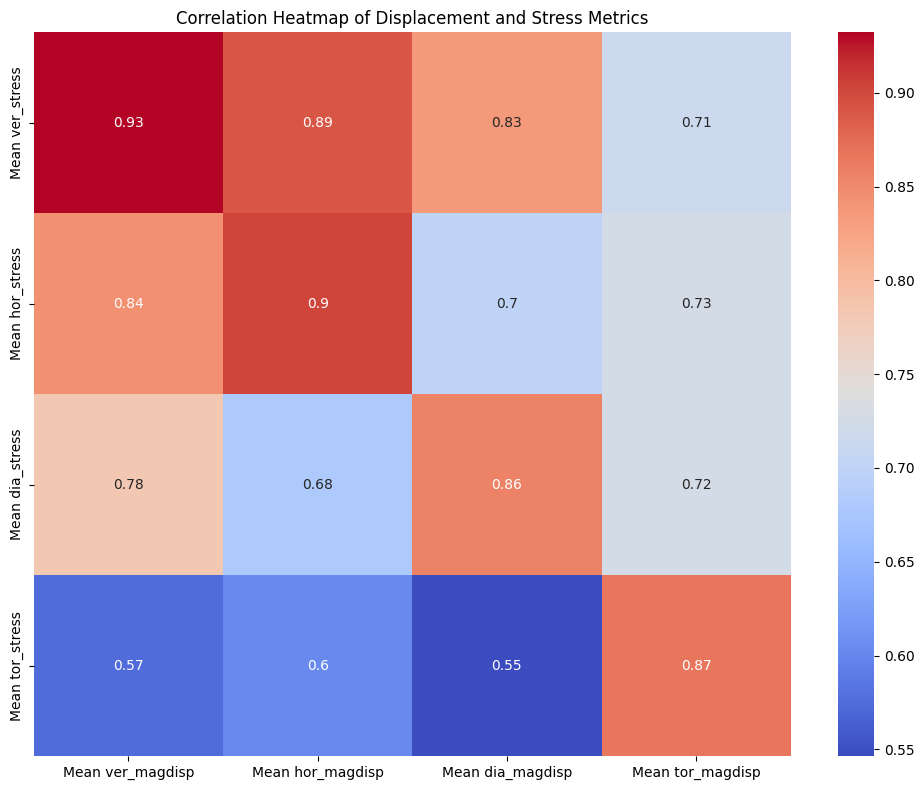

In [33]:
correlation_matrix = mean_data.corr()

# Extract a subset of the correlation matrix for better readability (focusing on displacement and stress metrics)
disp_columns = [
    'Mean ver_magdisp', 
    'Mean hor_magdisp',  
    'Mean dia_magdisp',  
    'Mean tor_magdisp'
]
stress_columns = [
    'Mean ver_stress', 
    'Mean hor_stress', 
    'Mean dia_stress', 
    'Mean tor_stress'
]
mean_correlation = correlation_matrix.loc[stress_columns, disp_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(mean_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Displacement and Stress Metrics")
plt.tight_layout()
plt.show()

In [46]:
upper_quantile_data.head(5)

,id,75% ver_magdisp,75% hor_magdisp,75% dia_magdisp,75% tor_magdisp,75% ver_stress,75% hor_stress,75% dia_stress,75% tor_stress
0,186,0.157651,0.119291,0.099729,0.013402,80.207110,70.435630,60.447510,23.508680
1,187,0.383602,0.263308,0.177774,0.046205,141.418950,125.268325,92.558525,61.065317
2,114,0.684914,0.569452,0.284084,0.013431,163.684375,164.325750,88.250040,32.747885
3,115,0.250465,0.073197,0.188224,0.019894,179.612800,73.734950,134.432100,43.362590
4,92,0.099481,0.056603,0.068998,0.007169,62.436767,52.887698,38.641218,14.231608


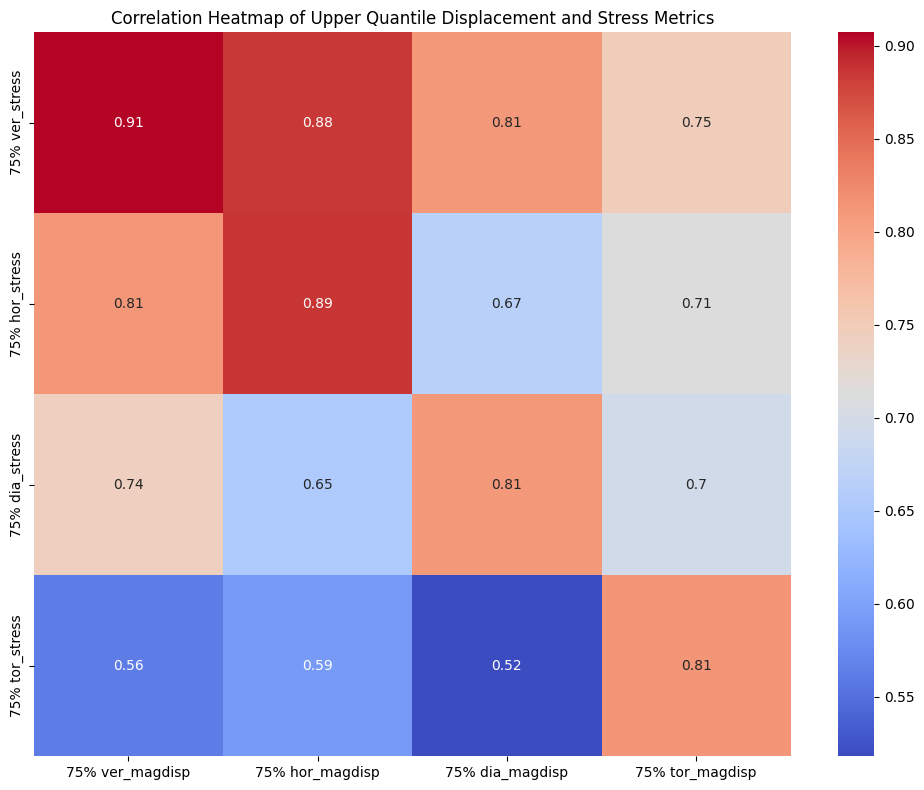

In [47]:
correlation_matrix = upper_quantile_data.corr()

# Extract a subset of the correlation matrix for better readability (focusing on displacement and stress metrics)
disp_columns = [
    '75% ver_magdisp', 
    '75% hor_magdisp',  
    '75% dia_magdisp',  
    '75% tor_magdisp'
]
stress_columns = [
    '75% ver_stress', 
    '75% hor_stress', 
    '75% dia_stress', 
    '75% tor_stress'
]
upper_quantile_correlation = correlation_matrix.loc[stress_columns, disp_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(upper_quantile_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Upper Quantile Displacement and Stress Metrics")
plt.tight_layout()
plt.show()

In [5]:
cad_data = pd.read_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv')

In [4]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_xdisp,max_ver_ydisp,max_ver_zdisp,...,category,num_tets,mass,download_file,link_name,author,author_id,test_split_0,test_split_1,test_split_2
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.176923,0.073638,0.288827,...,block,570111,1.375163,FINAL BRACKET AARON WEISSBART 8.9.2013 1930 pa...,ge-bracket-001-1,Aaron Weissbart,aaron.weissbart,False,True,False
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,0.687567,0.426113,1.059176,...,beam,431759,0.464950,bracket.STEP,ripple-bracket-1,simon,simon-240,False,False,False
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,1.180213,2.789576,3.713256,...,block,314815,0.514034,10813 new GE bracket.IGS,ge-bracket-26,Amartesh Sehgal,amartesh.sehgal-1,False,False,False
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.044753,0.299482,1.285331,...,beam,293971,0.399288,bracket_15.igs,ge-engine-bracket-15-1,Mandli Peter,mandli.peter,False,False,False
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,1.391756,0.360266,1.927059,...,beam,481030,0.350834,EngineBracketModified_PTJ.igs,modified-engine-bracket-2,Penn,penn-1,False,False,False


In [5]:
cad_data = cad_data.drop(columns=["download_file", "link_name", "author", "author_id", "test_split_0", "test_split_1", "test_split_2"])

In [8]:
print(cad_data.shape)
cad_data.head(5)

(381, 30)


,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_xdisp,max_ver_ydisp,max_ver_zdisp,...,max_dia_magdisp,max_dia_stress,max_tor_xdisp,max_tor_ydisp,max_tor_zdisp,max_tor_magdisp,max_tor_stress,category,num_tets,mass
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.176923,0.073638,0.288827,...,0.165667,319.0323,0.088575,0.005142,0.058669,0.174951,325.8028,block,570111,1.375163
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,0.687567,0.426113,1.059176,...,0.611791,752.3348,0.282236,0.179422,0.173602,0.399737,432.3469,beam,431759,0.464950
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,1.180213,2.789576,3.713256,...,3.761250,4342.2860,0.407567,0.124136,0.179077,0.495712,906.2914,block,314815,0.514034
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.044753,0.299482,1.285331,...,0.375712,469.8122,0.466680,0.118188,0.328034,0.583333,676.9794,beam,293971,0.399288
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,1.391756,0.360266,1.927059,...,0.787904,1507.5090,0.467292,0.195574,0.344641,0.604398,826.2255,beam,481030,0.350834


In [9]:
cad_data["density"] = cad_data["mass"]/cad_data["volume"]

In [10]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_xdisp,max_ver_ydisp,max_ver_zdisp,...,max_dia_stress,max_tor_xdisp,max_tor_ydisp,max_tor_zdisp,max_tor_magdisp,max_tor_stress,category,num_tets,mass,density
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.176923,0.073638,0.288827,...,319.0323,0.088575,0.005142,0.058669,0.174951,325.8028,block,570111,1.375163,0.000004
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,0.687567,0.426113,1.059176,...,752.3348,0.282236,0.179422,0.173602,0.399737,432.3469,beam,431759,0.464950,0.000004
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,1.180213,2.789576,3.713256,...,4342.2860,0.407567,0.124136,0.179077,0.495712,906.2914,block,314815,0.514034,0.000004
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.044753,0.299482,1.285331,...,469.8122,0.466680,0.118188,0.328034,0.583333,676.9794,beam,293971,0.399288,0.000004
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,1.391756,0.360266,1.927059,...,1507.5090,0.467292,0.195574,0.344641,0.604398,826.2255,beam,481030,0.350834,0.000004


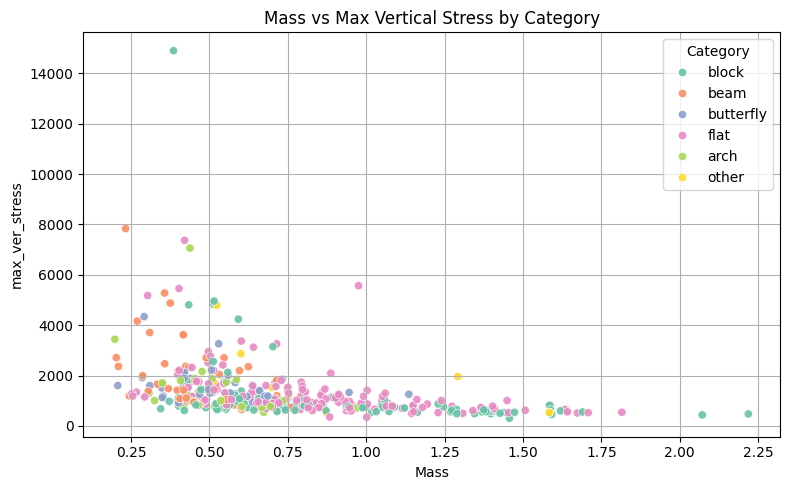

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=cad_data,
    x="mass",
    y="max_ver_stress",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"Mass vs Max Vertical Stress by Category")
plt.xlabel("Mass")
plt.ylabel("max_ver_stress")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
cad_data["principal_str1"] = ((cad_data["max_hor_stress"]+cad_data["max_ver_stress"])/2)+np.sqrt(((cad_data["max_hor_stress"] - cad_data["max_ver_stress"])/2)**2 + cad_data["max_dia_stress"])

In [15]:
cad_data["principal_str2"] = ((cad_data["max_hor_stress"]+cad_data["max_ver_stress"])/2)-np.sqrt(((cad_data["max_hor_stress"] - cad_data["max_ver_stress"])/2)**2 + cad_data["max_dia_stress"])

In [16]:
cad_data["VM_stress"] = np.sqrt(cad_data["principal_str1"]**2 + cad_data["principal_str2"]**2 - (cad_data["principal_str1"]*cad_data["principal_str2"]) + (3*cad_data["max_tor_stress"]))

In [6]:
cad_data.head(5)

,id,num_vertices,num_faces,volume,surface_area,average_edge_length,genus,max_ver_magdisp,max_hor_magdisp,max_dia_magdisp,max_tor_magdisp,category,num_tets,mass,density,principal_str1,principal_str2,VM_stress
0,0,42360,84764,307642.703591,73622.298369,1.347077,12.0,0.321826,0.239873,0.165667,0.174951,block,570111,1.375163,0.000004,659.877164,413.029336,578.325069
1,4,35622,71368,104015.598723,39149.667547,1.048514,32.0,1.222151,1.000106,0.611791,0.399737,beam,431759,0.464950,0.000004,1062.370300,903.485300,993.165361
2,6,35186,70532,114996.439753,58499.675375,1.306740,41.0,4.433872,0.965408,3.761250,0.495712,block,314815,0.514034,0.000004,4824.582762,1664.634238,4244.898019
3,8,24577,49174,89326.268569,30458.408764,1.130023,6.0,1.516299,1.608428,0.375712,0.583333,beam,293971,0.399288,0.000004,1016.793306,949.083394,985.716598
4,9,38322,76720,78486.321312,38243.142004,0.989507,20.0,2.183306,1.880950,0.787904,0.604398,beam,481030,0.350834,0.000004,1926.024972,1671.480028,1812.893841


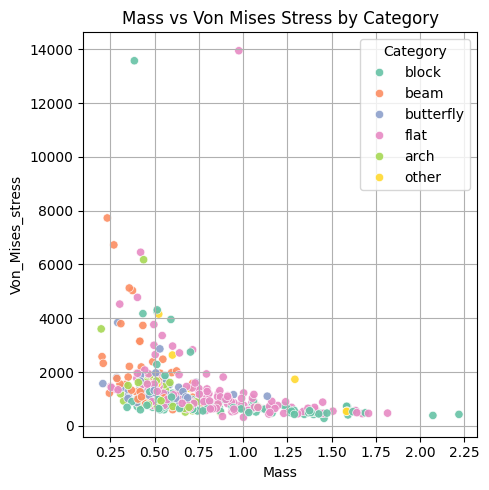

In [11]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="mass",
    y="VM_stress",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"Mass vs Von Mises Stress by Category")
plt.xlabel("Mass")
plt.ylabel("Von_Mises_stress")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


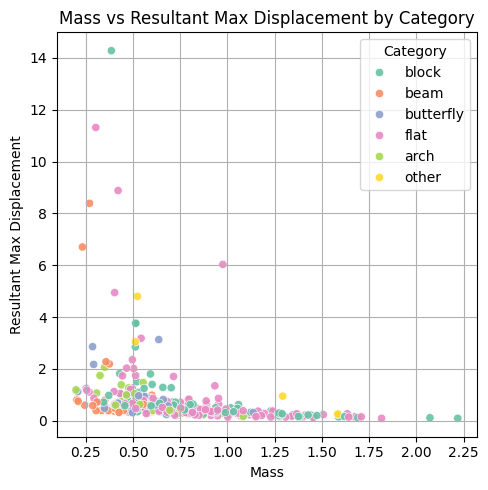

In [12]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="mass",
    y="max_dia_magdisp",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"Mass vs Resultant Max Displacement by Category")
plt.xlabel("Mass")
plt.ylabel("Resultant Max Displacement")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


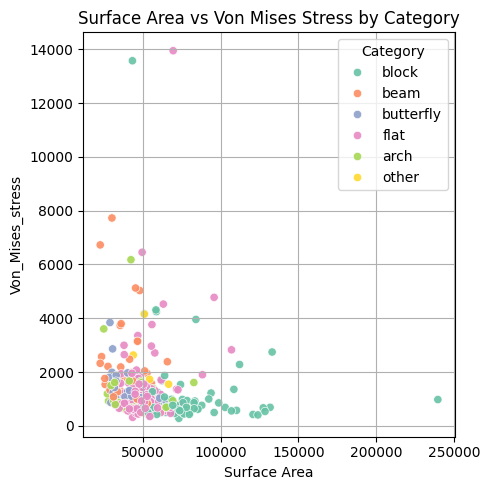

In [13]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="surface_area",
    y="VM_stress",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"Surface Area vs Von Mises Stress by Category")
plt.xlabel("Surface Area")
plt.ylabel("Von_Mises_stress")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()


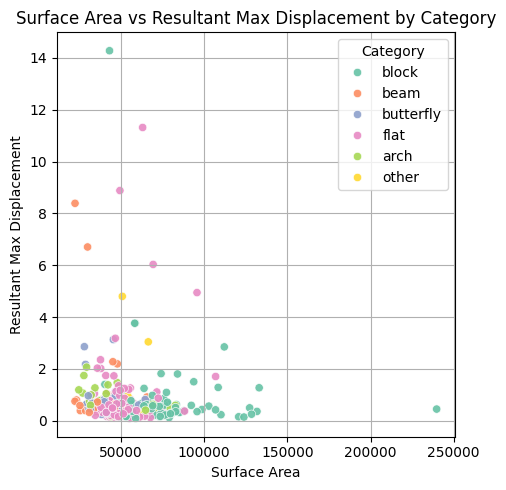

In [14]:
plt.figure(figsize=(5, 5))
sns.scatterplot(
    data=cad_data,
    x="surface_area",
    y="max_dia_magdisp",
    hue="category",
    palette="Set2",
    alpha=0.9
)
plt.title(f"Surface Area vs Resultant Max Displacement by Category")
plt.xlabel("Surface Area")
plt.ylabel("Resultant Max Displacement")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
cad_data.to_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv', index=False)

In [20]:
cad_data = cad_data.drop(columns=["max_ver_stress", "max_hor_stress", "max_dia_stress", "max_tor_stress", "max_ver_xdisp", "max_ver_ydisp", "max_ver_zdisp", "max_hor_xdisp", "max_hor_ydisp", "max_hor_zdisp", "max_dia_xdisp", "max_dia_ydisp", "max_dia_zdisp", "max_tor_xdisp", "max_tor_ydisp", "max_tor_zdisp"])

In [22]:
cad_data.to_csv('/Users/User/Documents/Project_JEB/Results/Data_Analysis/working_table.csv', index=False)